In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [4]:
# generate points used to plot and matrix version
x_plot = np.linspace(-1.3, 1.3, 1000)
X_plot = x_plot[:, None]

In [77]:
# generate points and keep a subset of them
N = 15; σ = 0.2

x = np.linspace(-1, 1, N)
rng = np.random.RandomState(4)
y = x**2 + rng.randn(N) * σ + .4
p = rng.permutation(len(x))
x, y = x[p], y[p]

In [156]:
def plot_data(x_train, y_train, x_test, y_test, fig_idx):
    marker_sz = 30
    plt.scatter(x_train, y_train, facecolors='.4', edgecolors='.4', s=marker_sz, marker='o', label="training points")
    plt.scatter(x_test, y_test, facecolors='none', edgecolors='.8', s=marker_sz, marker='o', label="testing points")
    plt.axis('equal')
    plt.axis((-1.5, 1.5, -0.5, 2.5))
    plt.axhline(c='.8')
    plt.axvline(c='.8')

In [154]:
def plot_model(x_train, y_train, x_test, y_test, degree):
    # Fit model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x_train[:, None], y_train)
    # Plot prediction
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color='k', linewidth=2, label="degree %d" % degree)
    # Compute errors
    y_train_pred = model.predict(x_train[:, None])
    y_test_pred = model.predict(x_test[:, None])
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    plt.text(-1.4, -.5, f'TrE: {train_mse:.2f}', backgroundcolor='w')
    plt.text(.2, -.5, f'TsE: {test_mse:.2f}', backgroundcolor='w')

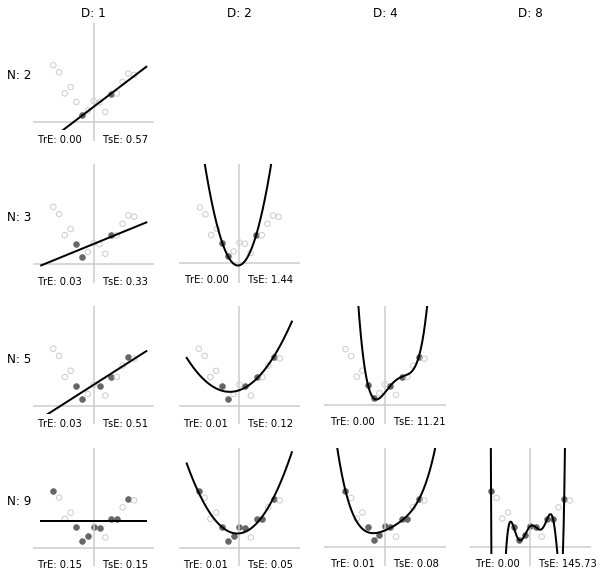

In [157]:
plt.figure(facecolor='white', figsize=(10,10))

degrees = (1, 2, 4, 8)
nb_points = (2, 3, 5, 9)
fig_idx = 0

for n in nb_points:
    x_train, x_test = x[:n], x[n:]
    y_train, y_test = y[:n], y[n:]
    for degree in degrees:
        fig_idx += 1
        plt.subplot(len(nb_points), len(degrees), fig_idx)
        # plt.axis('off')
        plt.box(on=None)
        plt.tick_params(axis='both', which='both', bottom=False, top=False,
                        labelbottom=False, right=False, left=False, labelleft=False)
        if n == nb_points[0]: plt.title(f'D: {degree}')
        if degree == degrees[0]: plt.ylabel(f'N: {n}' + 5 * ' ', rotation=0, size='large')
        if n - 1 < degree: continue
        plot_data(x_train, y_train, x_test, y_test, fig_idx)
        plot_model(x_train, y_train, x_test, y_test, degree)

plt.savefig('Curve-fitting.png')